## Gradientenabstiegsverfahren von Grund auf erklärt
<img width=300 height=300 class="imgright" src="Images/climbing1.png" alt="restaurant" />

In unserem Beispiel der linearen Regression haben wir getestet, welche der Kombinationen von Änderungen von m (Steigung) und b (Schnittpunkt mit der y-Achse) jeweils zu einer Verminderung des Gesamtfehlers führen und haben schrittweise diese Parameter-Kombination optimiert. Wir hatten die Optimierung so durchgeführt, dass wir die Parameter jeweils um kleine Beträge verändert haben in plus- und minus-Richtung und dann jeweils den besten Wert für den entsprechenden Parameter im nächsten Optimierungsschritt verwendet haben. <br><br>Jetzt wollen wir ein schnelleres und gebräuchlicheres Verfahren besprechen, das Gradientenabstiegsverfahren, bei der die Gesamtfehlerfunktion nach den einzelnen Parametern differenziert wird und so das Fehlerminimum und die zugehörigen Parameterwerte bestimmt werden. Das Ziel ist wieder, die Parameter dann unabhängig voneinander so zu verändern, dass das Fehlerminimum gefunden wird. Dies wird durch kleine Schritte erreicht, deren Grösse von der Entfernung zum Minimum abhängen.

Um unsere Überlegungen zu erleichtern, lassen wir jetzt wieder die Optimierung von b zunächst wieder einmal weg und beschränken uns auf das Modell mit alleiniger Optimierung von m, <b>b wird konstant auf 0 gesetzt</b>.
Wir zeichnen nun zunächst eine Kurve, die uns den Gesamtfehler für unser System in Abhängigkeit von m angibt:

 Minimum Fehlerquadratsumme 15486.000000000042 bei m von  1.04


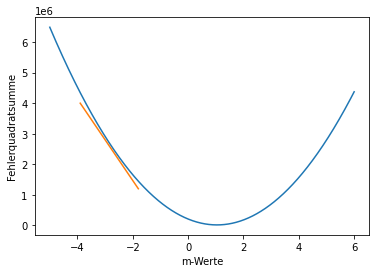

In [1]:
import matplotlib.pyplot as plt
b=0

def gesamtfehler(x_werte,y_werte,m):
    sum_0=0
    for i in range(len(x_werte)):
            sum_0+=(m*x_werte[i]+b - y_werte[i])**2 
    return sum_0


x,y=[],[]    
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x_roh,y_roh=line.rstrip().split(",")        
        x.append(int(x_roh))#x und y kommt als String
        y.append(int(y_roh))

    
res_list,m_list=[],[]
m=-5
while m<6:
    m_list.append(m)
    res_list.append(gesamtfehler(x,y,m))
    m+=.01
plt.xlabel("m-Werte", fontsize=10)                 
plt.ylabel("Fehlerquadratsumme", fontsize=10)
plt.plot(m_list,res_list)
plt.plot([-3.9,-1.8],[4e6,1.2e6]) # Beispiel Tangente

#print(m_list.index(1.0399999999999383))
print(f" Minimum Fehlerquadratsumme {res_list[604]} bei m von {m_list[res_list.index(min(res_list))]:5.2f}") #wo ist das Minimum?


Wir sehen hier eine glatte Kurve mit einem Minimum für m bei 1.04. Wollen wir diesen Punkt (x,y) für das Minimum von m in unserer Grafik finden, so wäre eine Möglichkeit, an jedem beliebigen Punkt der Kurve deren Steigung festzustellen, wie es die orange Linie (Tangente) an einer Stelle exemplarisch tut. Am Minimum der Kurve wäre dann die Steigung 0. Um diesen Punkt <b> mit schrittweiser Veränderung von m</b> zu finden, würde man sich bei negativer Steigung (wie dargestellt) einen Schritt zu grösseren m-Werten hin bewegen, bei positver Steigung umgekehrt. Man könnte zusätzlich noch die Grösse des Schritts von der Grösse der Steigung abhängig machen, je steiler, desto grösser der Schritt. Wir würden also das Minimum mittels Differentialrechnung finden. (Wir könnten hier im Falle nur eines Parameters natürlich direkt den Minimalwert berechnen, an dem die Steigung der Fehlerfunktion 0 ist. Bei Problemen mit mehreren (bis vielen) Parametern ist die Funktion für den Gesamtfehler aber meist sehr komplex, Einzelfehlerkurven für jeden der Parameter sind dann bei konstanten Werten für die anderen Parameter darstellbar (und hoffentlich differenzierbar), die Gesamtfehlerfunktion aber nur noch iterativ zu optimieren.)

Um dies zu erreichen, müsste man die Fehlerkurve differenzieren. 
Die Gleichung für die Fehlerquadratsumme lautet:<br>
<br> 
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (x_i*m+b-y_i)^2$$
<br><br>
für b = 0, <br><br>
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (x_i*m-y_i)^2$$
    

<b>Leiten wir dieses nach m ab</b> (die x-Werte und y-Werte und damit auch der Einzelwert x[i] und y[i] sowie n stellen Konstanten dar) so erhält man (äussere Ableitung mal innere Ableitung):
<br><br> 
$$dmittlereFehlerquadratsumme/dm = 2/n\sum_{i=1}^{n} x_i * (x_i*m -y_i)$$<br>


Passen wir nun unser ursprüngliches Modell ohne Optimierung von b unserer neuen Methode an:

In [2]:
def trainieren(x_werte,y_werte,anzahl_durchgänge,lernrate):
    m=0
    b=0
    
    for lauf in range(anzahl_durchgänge):
        gradient_sum=0
        for i in range(len(x_werte)):            
            gradient_sum+=x_werte[i]*(x_werte[i]*m - y_werte[i]) #Ableitung Fehlerquadratsummenkurve
        change= 2*-gradient_sum/len(x_werte) *lernrate         
        if abs(change)<1e-3: #Kurvensteigung (Tangente) kleiner 1/1000 Änderung
            print(f"\nEnde, keine Verbesserung mehr möglich  m = {m:5.2f}, b = 0 in Lauf {lauf} \n")
            return m
        else:
            m += change 
        
    return m



def voraussagen(m,x,y):
    my_sum=0
    for x_item,y_item in sorted(zip(x,y)):
        print(f"X-Wert:{x_item:4.2f} wahrer Y-Wert:{y_item:4.2f} vorausgesagter Y-Wert: {x_item*m:4.2f}")
        my_sum+=(y_item-x_item*m)**2
    print (f"Fehlerquadratsumme: {my_sum}")
    return

x,y=[],[]    
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x_roh,y_roh=line.rstrip().split(",")        
        x.append(int(x_roh))#x und y kommt als String
        y.append(int(y_roh))#wir schreiben unsere Reservierungen und die Anzahl der Mahlzeiten in L

   

voraussagen(trainieren(x,y,1000,1e-4),x,y)


Ende, keine Verbesserung mehr möglich  m =  1.04, b = 0 in Lauf 6 

X-Wert:2.00 wahrer Y-Wert:30.00 vorausgesagter Y-Wert: 2.08
X-Wert:3.00 wahrer Y-Wert:34.00 vorausgesagter Y-Wert: 3.12
X-Wert:4.00 wahrer Y-Wert:35.00 vorausgesagter Y-Wert: 4.16
X-Wert:5.00 wahrer Y-Wert:32.00 vorausgesagter Y-Wert: 5.21
X-Wert:10.00 wahrer Y-Wert:32.00 vorausgesagter Y-Wert: 10.41
X-Wert:11.00 wahrer Y-Wert:43.00 vorausgesagter Y-Wert: 11.45
X-Wert:13.00 wahrer Y-Wert:26.00 vorausgesagter Y-Wert: 13.54
X-Wert:14.00 wahrer Y-Wert:45.00 vorausgesagter Y-Wert: 14.58
X-Wert:16.00 wahrer Y-Wert:35.00 vorausgesagter Y-Wert: 16.66
X-Wert:17.00 wahrer Y-Wert:46.00 vorausgesagter Y-Wert: 17.70
X-Wert:19.00 wahrer Y-Wert:44.00 vorausgesagter Y-Wert: 19.78
X-Wert:20.00 wahrer Y-Wert:52.00 vorausgesagter Y-Wert: 20.82
X-Wert:23.00 wahrer Y-Wert:52.00 vorausgesagter Y-Wert: 23.95
X-Wert:24.00 wahrer Y-Wert:53.00 vorausgesagter Y-Wert: 24.99
X-Wert:25.00 wahrer Y-Wert:56.00 vorausgesagter Y-Wert: 26.03
X-Wert:28

Wir erhalten nahezu identische Werte zu unserem Programm im letzten Kapitel, als wir auch nur m optimierten, aber dies bereits nach 6 Läufen und nicht nach 10419 Läufen bei gleicher Lernrate von 1e-4.
Die Methode scheint also sehr effizient zu sein.
Man beachte auch, dass die Änderung von m nicht mehr in festen Schritten erfolgt wie vorher. Die bei der Optimierung immer kleiner werdende Steigung der Fehlerquadratsumme wird mit der Lernrate multipliziert und dieses immer kleiner werdende Produkt als Änderung zu m addiert. Wir haben damit bei Annäherung an unseren Optimalwert automatisch immer kleinere Änderungsschritte.<br><br>
Nun wollen wir die mittlere Fehlerquadratsumme der Geradengleichung für den Parameter b ermitteln, <b>m bleibt konstant</b>.
<br><br>
Um dies zu erreichen, müsste man die Fehlerkurve differenzieren. 
Die Gleichung für die Fehlerquadratsumme lautet:<br>
<br> 
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (x_i*m+b-y_i)^2$$

<br><br>
für m = 0, konstant und willkürlich auf 0 gesetzt<br><br>
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (b-y_i)^2$$<br>

Dasselbe können wir auch für b durchführen und dabei m konstant halten.
Die Ableitung der Fehlerquadratsumme nach b sieht folgendermassen aus:
<br>
$$dmittlereFehlerquadratsumme/db = 2/n\sum_{i=1}^{n}  (b -y_i)$$<br>

Hier die Kurven der Fehlerquadratsumme für m (b=0) und für b (m=0).<br><br>
<img width=600 height=600 class="imgright" src="Images/Fehlerquadratsumme_mb.png"  />



Und unser Programm würde sich wie folgt verändern:
    

In [2]:
def trainieren(x_werte,y_werte,anzahl_durchgänge,lernrate):
    m=0
    b=0
    for lauf in range(anzahl_durchgänge):
        gradient_sum=0
        for i in range(len(x_werte)):
            gradient_sum+=(x_werte[i]*m+b - y_werte[i]) #m=0
        change= 2*-gradient_sum/len(x_werte) *lernrate        
        if abs(change)<1e-3:
            print(f"\nEnde, keine Verbesserung mehr möglich  m ={m:5.2f} in Lauf {lauf} \n")
            return b
        else:
            b += change
        
    return b

def voraussagen(b):
    fehler,Ergebnisse=0,{30:49.3,50:61.1,80:78.7}
    print(f" {b:2.3f} errechneter b-Wert\n")
    for x,y in Ergebnisse.items():
        print(f" Für {x} Reservierungen auf der vorausgesagten Geraden: {b:6.2f}, Wert der Referenzgeraden: {y} \n")
        fehler+=(b-y)**2
    print(f" Gesamtfehler {fehler}")    

x,y=[],[]    
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x_roh,y_roh=line.rstrip().split(",")        
        x.append(int(x_roh))#x und y kommt als String
        y.append(int(y_roh))#wir schreiben unsere Reservierungen und die Anzahl der Mahlzeiten in L

   

voraussagen(trainieren(x,y,1000,.13))


Ende, keine Verbesserung mehr möglich  m = 0.00 in Lauf 33 

 61.557 errechneter b-Wert

 Für 30 Reservierungen auf der vorausgesagten Geraden:  61.56, Wert der Referenzgeraden: 49.3 

 Für 50 Reservierungen auf der vorausgesagten Geraden:  61.56, Wert der Referenzgeraden: 61.1 

 Für 80 Reservierungen auf der vorausgesagten Geraden:  61.56, Wert der Referenzgeraden: 78.7 

 Gesamtfehler 444.3251533808939


Wir sehen hier bei noch grossem Gesamtfehler eine relativ geringe Anzahl von Läufen bis zum Optimum. Nachdem wir nun gezeigt haben, dass man die Optimierung für beide Einzelparameter durchführen kann, werden wir nun unsere beiden Verfahren kombinieren und erhalten dann:

In [3]:
def trainieren(x_werte,y_werte,anzahl_durchgänge,lernrate_m,lernrate_b):
    m=0
    b=0
    for lauf in range(anzahl_durchgänge):
        gradient_sum_b,gradient_sum_m=0,0
        for i in range(len(x_werte)):
            gradient_sum_b+=(x_werte[i]*m+b - y_werte[i])            
            gradient_sum_m+= x_werte[i]*(x_werte[i]*m+b - y_werte[i])
        change_b=2*-gradient_sum_b/len(x_werte) *lernrate_b
        change_m=2*-gradient_sum_m/len(x_werte) *lernrate_m  
        
        if abs(change_b)<.01 and abs(change_m)<.01:
            print(f"\nEnde, keine Verbesserung mehr möglich m = {m:5.2f} b= {b:5.2f} in Lauf {lauf} \n")
            return m,b
        else:
            b += change_b
            m += change_m            
    return m,b

def voraussagen(m,b,x,y):
    my_sum=0
    for x_item,y_item in sorted(zip(x,y)):
        print(f"X-Wert:{x_item:4.2f} wahrer Y-Wert:{y_item:4.2f} vorausgesagter Y-Wert: {x_item*m+b:4.2f}")
        my_sum+=(y_item-x_item*m)**2
    print (f"Fehlerquadratsumme: {my_sum}")
    return
    
x,y=[],[]    
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x_roh,y_roh=line.rstrip().split(",")        
        x.append(int(x_roh))#x und y kommt als String
        y.append(int(y_roh))#wir schreiben unsere Reservierungen und die Anzahl der Mahlzeiten in L

   

voraussagen(*trainieren(x,y,1000,1e-4,1e-1),x,y)


Ende, keine Verbesserung mehr möglich m =  0.59 b= 31.49 in Lauf 97 

X-Wert:2.00 wahrer Y-Wert:30.00 vorausgesagter Y-Wert: 32.67
X-Wert:3.00 wahrer Y-Wert:34.00 vorausgesagter Y-Wert: 33.26
X-Wert:4.00 wahrer Y-Wert:35.00 vorausgesagter Y-Wert: 33.85
X-Wert:5.00 wahrer Y-Wert:32.00 vorausgesagter Y-Wert: 34.44
X-Wert:10.00 wahrer Y-Wert:32.00 vorausgesagter Y-Wert: 37.40
X-Wert:11.00 wahrer Y-Wert:43.00 vorausgesagter Y-Wert: 37.99
X-Wert:13.00 wahrer Y-Wert:26.00 vorausgesagter Y-Wert: 39.17
X-Wert:14.00 wahrer Y-Wert:45.00 vorausgesagter Y-Wert: 39.76
X-Wert:16.00 wahrer Y-Wert:35.00 vorausgesagter Y-Wert: 40.94
X-Wert:17.00 wahrer Y-Wert:46.00 vorausgesagter Y-Wert: 41.53
X-Wert:19.00 wahrer Y-Wert:44.00 vorausgesagter Y-Wert: 42.71
X-Wert:20.00 wahrer Y-Wert:52.00 vorausgesagter Y-Wert: 43.30
X-Wert:23.00 wahrer Y-Wert:52.00 vorausgesagter Y-Wert: 45.07
X-Wert:24.00 wahrer Y-Wert:53.00 vorausgesagter Y-Wert: 45.66
X-Wert:25.00 wahrer Y-Wert:56.00 vorausgesagter Y-Wert: 46.25
X-W

Dieses Verfahren läuft mit sehr schneller Annäherung ans Optimum.<b> Wichtig zu erwähnen ist, daß man davon ausgeht, dass die Gewichte voneinander unabhängig verändert werden können, um zum Fehlerminimum zu kommen. Diese Annahme ist nur zu halten, wenn die Lernrate genügend klein ist. Alle Gewichte werden dann um einen kleinen Betrag in die richtige Richtung verändert. Es könnte bei hohen Lernraten ein Gewicht zufällig die Oberhand gewinnen und das Ergebnis quasi allein bestimmen.</b>
Ob es möglich ist, das Verfahren zu verwenden, hängt davon ab, ob die jeweilige Funktion für den Fehler (bei uns die Fehlerquadratsumme) glatt verläuft und keine Sprünge macht, sodass man sie differenzieren kann, und ob sie nur ein Minimum hat oder mehrere, von denen dann eines zufällig angesteuert wird, aber nicht zwingend das <b>absolute Minimum</b>. Für hohe Werte der Lernrate funktioniert unser Verfahren nicht. Der jeweilige Änderungsschritt der Parameter, der sich aus der Steigung der Fehlerfunktion ergibt, kann so groß ein, daß der neue Wert zu einem höheren Wert der Fehlerfunktion führt. Die Veränderung wird dann noch größer beim nächsten Schritt und dies kann zu sich ständig erhöhenden Fehlerwerten führen, wie unsere Grafik unten zeigt. 


<img class="imgright" src="Images/overshoot.png" alt="overshoot" />
Hier führt jeder Schritt der Anpassung, weil er zu groß ist, zu immer schlechteren Werten auf der Fehlerfunktion.
Man nennt dies "overshoot" oder überschwingen. Deshalb muss die Lernrate genügend klein sein und als Hyperparameter optimiert werden.